In [1]:
# Import dependencies

import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load csv file into a dataframe and understand its features
crypto_df = pd.read_csv("data/crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Find any null values or duplicate values ixists
crypto_df.duplicated().sum()
crypto_df.isna().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    508
TotalCoinSupply      0
dtype: int64

In [4]:
# Remove null values containing rows and column named 'Unnamed: 0'
crypto_df.dropna(inplace = True)
crypto_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
# Filter data for column value IsTrading == True
crypto_currency_df = crypto_df.loc[crypto_df.IsTrading == True]

# Filter data again for column value TotalCoinsMined > 0
crypto_currency = crypto_currency_df.loc[crypto_currency_df.TotalCoinsMined > 0].copy()
crypto_currency

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
# Convert text values into numerical values
crypto_money = pd.get_dummies(crypto_currency)
crypto_money["IsTrading"] = 1
crypto_money

,IsTrading,TotalCoinsMined,CoinName_ ClubCoin,CoinName_1717 Masonic Commemorative Token,CoinName_1Credit,CoinName_404Coin,CoinName_42 Coin,CoinName_8BIT Coin,CoinName_AC3,CoinName_ALAX,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,1,4.199995e+01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.055185e+09,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,2.927942e+10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1.792718e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1,1.493105e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,1,9.802226e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,1,7.296538e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardise the data to avoid unduly influence of larger data
crypto_scaled = StandardScaler().fit_transform(crypto_money)

# Fit scaled data into pca model
pca = PCA(n_components = 440, svd_solver='full', random_state=0)
crypto_pca = pca.fit_transform(crypto_scaled)

In [18]:

print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
pca.explained_variance_ratio_

Explained variance: 0.9000
Individual variance contributions:


array([0.0045878 , 0.00442085, 0.00441358, 0.00441358, 0.00440182,
       0.00418085, 0.00399564, 0.00395766, 0.00382963, 0.00364154,
       0.00354785, 0.00349403, 0.00346587, 0.00341151, 0.00338465,
       0.00331317, 0.00331235, 0.00331019, 0.00331019, 0.00331019,
       0.00331019, 0.00331019, 0.00331012, 0.00330864, 0.00329454,
       0.00327548, 0.00327001, 0.00321649, 0.00318399, 0.00317212,
       0.00316609, 0.00316346, 0.00314547, 0.00312768, 0.00311795,
       0.00311202, 0.00310663, 0.00308902, 0.00307868, 0.00304314,
       0.00304119, 0.00303474, 0.00302074, 0.00300592, 0.00299824,
       0.00299729, 0.00299087, 0.00298879, 0.00298487, 0.00296821,
       0.00296285, 0.00295925, 0.00293359, 0.00293077, 0.00289473,
       0.00287909, 0.00286518, 0.00284058, 0.00278586, 0.0027689 ,
       0.00273645, 0.00268434, 0.00267735, 0.00266875, 0.00266027,
       0.00261873, 0.00259157, 0.00258074, 0.00255405, 0.00253355,
       0.00251816, 0.00241818, 0.00234428, 0.00225051, 0.00222

Text(0, 0.5, 'Cumulative explained varaince')

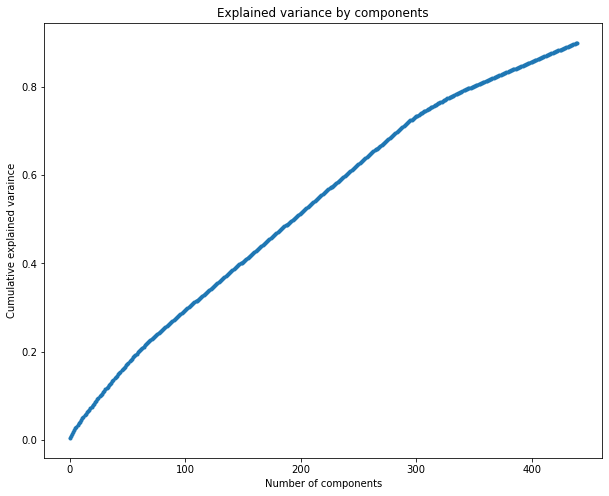

In [19]:
# plotting explained variance ratio to know the nature of its distribution
import seaborn as sns

plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='.', linestyle = '-')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained varaince")

# Analysis
According to the explained variance, 440 principal components together contains 90% of the variance.

In [24]:
# Create a new dataframe for t_SNE
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

In [25]:
crypto_pca['x'] = tsne_features[:,0]
crypto_pca['y'] = tsne_features[:,1]
plt.scatter(crypto_pca.x, crypto_pca.y)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices